<a href="https://colab.research.google.com/github/harika1795/CreditcardApproval-capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project proposal to predict credit card approval

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time.


Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.

**Attribute Descriptions**:-

Gender: This column indicates the gender of the individual, either male or female. It is a Categorical (binary).

Car_Owner: This column indicates whether the individual owns a car or not, either Yes or No.It is a Categorical (binary).

Propert_Owner: This column indicates whether the individual owns a property or not, either Yes or No.It is a Categorical (binary).

Children: This column indicates the number of children the individual has.It is a Numerical(integer).

Annual_income: This column contains the annual income of the individual.It is a Numerical (continuous).

Type_Income: This column indicates the type of income the individual earns, such as salary or self-employed income.It is a Numerical (nominal).

Education: This column indicates the level of education of the individual. It is a Categorical (ordinal).

Marital_status: This column indicates the marital status of the individual, such as Single, Married, Divorced, etc. It is a Categorical (nominal).

Housing_type: This column indicates the type of housing the individual lives in, such as a house or apartment. It is a Categorical (nominal).

Birthday_count: This column contains the age of the individual.It is a Numerical(integer).

Employed_days: This column indicates the number of days the individual has been employed.It is a Numerical(integer).

Mobile_phone, Work_Phone, Phone, and Email_id: These columns contain contact information for the individual, such as mobile phone number, work phone number, home phone number, and email id.Mobile_phone, Work_Phone, Phone are Categorical (binary) and Email_id is Categorical (nominal).

Type_Occupation: This column indicates the type of occupation of the individual, such as healthcare or education. It is a Categorical (nominal).

Family_Members: This column indicates the number of family members the individual has.It is a Numeric (integer).

Label: This column contains the label for credit card approval, either approved or not approved. It is a Categorical (binary).




2) How is it going to impact the banking sector?

A) predicting credit card approval using machine learning can have a transformative impact on the banking sector by improving the customer experience, reducing risk, and increasing profitability.

Improved customer experience: By using predictive models, banks can offer faster and more accurate credit card approvals, which can improve the overall customer experience. This can lead to increased customer satisfaction and loyalty.

Reduced risk of credit defaults: Machine learning algorithms can help banks to accurately predict the likelihood of a client defaulting on their credit card payments. By identifying clients with lower credit risk profiles, banks can offer credit cards with lower interest rates, which can reduce the risk of defaults and ultimately improve the bank's profitability.

Improved profitability: By reducing the risk of credit defaults and improving the efficiency of the underwriting process, banks can increase their profitability. This can help banks to offer better rates and benefits to their clients, leading to increased market share and revenue.





3) If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

A) If there is a gap in the knowledge or process used by a bank in India for credit card approval, the proposed method can be helpful for banks in India by improving the accuracy of credit card approval predictions, enhancing credit risk management strategies, and improving efficiency. However, to fully leverage the benefits of our proposed method, banks will need to ensure that they have access to reliable and comprehensive data sources.



# Importing Libraries

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Ignoring Warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")# ignoring warnings

# Data Collection

In [ ]:
credit=pd.read_csv("Credit_card.csv")# reading url dataset
credit_lab=pd.read_csv("Credit_card_label.csv")# reading url dataset
credit_card=pd.merge(credit,credit_lab,on='Ind_ID')#merging the dataset on common column

In [ ]:
credit_card_raw=credit_card.copy()# creating a copy of read file

# Data Preprocessing

In [ ]:
credit_card_raw.shape # exploring number of observations and variables

(1548, 19)

We have 1548 observations and 19 variables.

In [ ]:
credit_card_raw.head()# head function to identify any erroneous value
# Aim is to check if data looks fine

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


There are missing values in multiple columns in form of NaN.
Type_Occupation column has many missing values.

Label:

 * 0 is application approved
 * 1 is application rejected

In [ ]:
credit_card_raw.tail()# tail function to identify any erroneous value
# Aim is to check if data looks fine

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


There are missing values in multiple columns in form of NaN.
Index 1543 and 1547 has missing values.

In [ ]:
credit_card_raw.columns # checking column names
# some column names to be renamed

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [ ]:
credit_card_raw.dtypes # Checking if datatypes are read correctly.
# We have to be sure about data types first and then match it with dtypes result.
# If it is correct we are good otherewise we have to change the data type.

Ind_ID               int64
GENDER              object
Car_Owner           object
Propert_Owner       object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
label                int64
dtype: object

In [ ]:
credit_card_raw.nunique()# nuniuqe function to count unique values in each column


Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
Birthday_count     1270
Employed_days       956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

*   It is to check if each column has correct values, specifically categorical variable


In [ ]:
credit_card_raw.drop_duplicates() # check if there are duplicates

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [ ]:
credit_card_raw[credit_card_raw.duplicated]

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label


In [ ]:
credit_card_raw.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
credit_card_raw.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

# Data Cleaning

In [ ]:
credit_card_raw.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
credit_card_raw['age']=np.abs(credit_card_raw['Birthday_count']/365)
credit_card_raw['experience']=np.abs(credit_card_raw['Employed_days']/365)

In [ ]:
credit_card_raw['Annual_income'].fillna(credit_card_raw['Annual_income'].median(), inplace=True)
credit_card_raw['age'].fillna(credit_card_raw['age'].mean(), inplace=True)

In [ ]:
credit_card_raw=credit_card_raw.drop(['Birthday_count','Employed_days'],axis=1)

In [ ]:
credit_card_raw

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,age,experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,1,0,0,0,NaN,2,1,51.430137,1000.665753
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,43.946143,1.605479
3,5009749,F,Y,N,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,1,1,1,0,NaN,2,1,37.142466,1.605479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,166500.0,Commercial associate,Higher education,Married,House / apartment,1,0,0,0,Managers,2,0,32.758904,5.978082
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,1,0,0,0,Accountants,1,0,28.024658,3.312329
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,1,0,0,0,Managers,4,0,36.093151,6.786301
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,1,1,1,0,Drivers,2,0,41.895890,1.767123


# Removing Missing values

In [ ]:
credit_card_raw['GENDER']=credit_card_raw['GENDER'].fillna(credit_card_raw['GENDER'].mode()[0])
credit_card_raw['Type_Occupation']=credit_card_raw['Type_Occupation'].fillna(credit_card_raw['Type_Occupation'].mode()[0])

In [ ]:
credit_card_raw.isnull().sum()


Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
age                0
experience         0
dtype: int64

# EDA

0    1373
1     175
Name: label, dtype: int64


Text(0.5, 1.0, 'Total Number of credit card approved and not approved people')

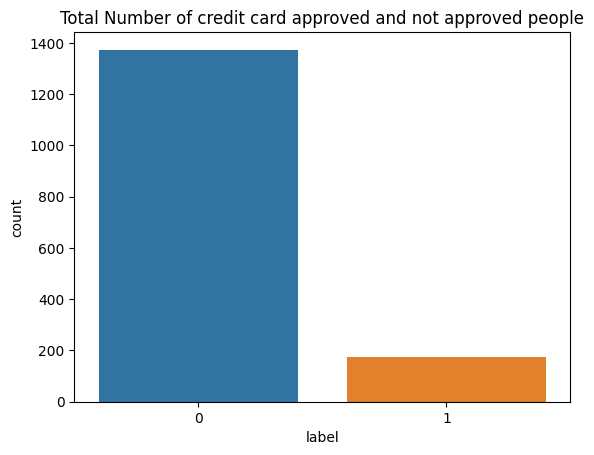

In [ ]:
# Categorical variables visualization

print(credit_card_raw['label'].value_counts())
sns.countplot(x=credit_card_raw['label'])
plt.title("Total Number of credit card approved and not approved people")


F    980
M    568
Name: GENDER, dtype: int64


<Axes: xlabel='GENDER', ylabel='count'>

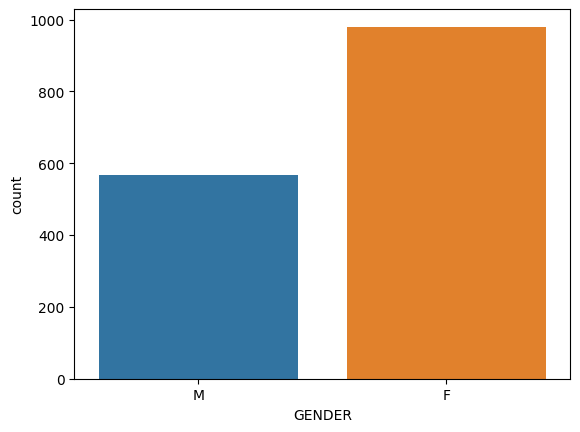

In [ ]:
print(credit_card_raw['GENDER'].value_counts())
sns.countplot(x=credit_card_raw['GENDER'])

Married                 1049
Single / not married     227
Civil marriage           101
Separated                 96
Widow                     75
Name: Marital_status, dtype: int64


Text(0.5, 1.0, 'Number of people Marital status wise')

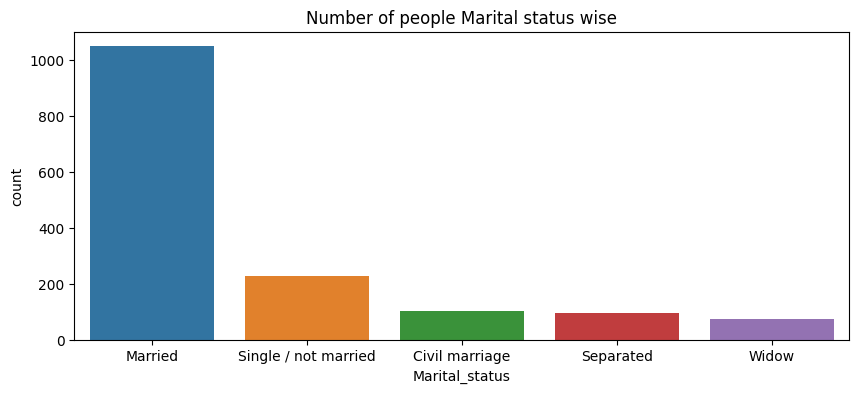

In [ ]:
print(credit_card_raw['Marital_status'].value_counts())
plt.figure(figsize=(10,4))
sns.countplot(x=credit_card_raw['Marital_status'])
plt.title("Number of people Marital status wise")

Working                 798
Commercial associate    365
Pensioner               269
State servant           116
Name: Type_Income, dtype: int64


Text(0.5, 1.0, 'Number of people Income Type wise')

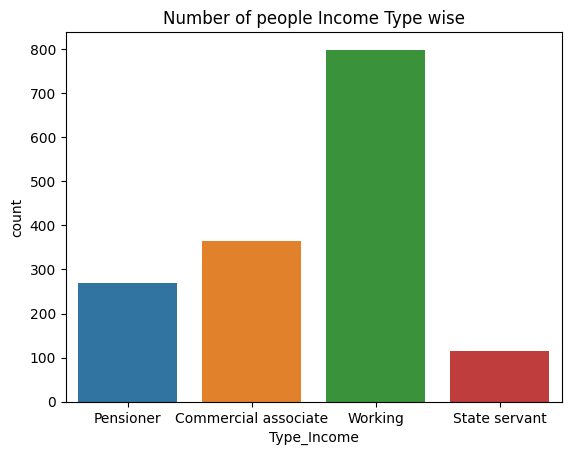

In [ ]:
print(credit_card_raw['Type_Income'].value_counts())
sns.countplot(x=credit_card_raw['Type_Income'])
plt.title("Number of people Income Type wise")

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64


Text(0.5, 1.0, 'Number of people Education wise')

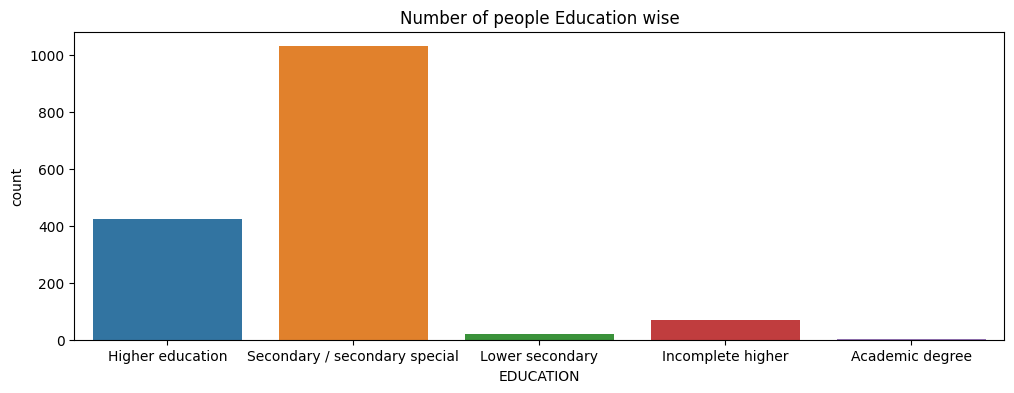

In [ ]:
print(credit_card_raw['EDUCATION'].value_counts())
plt.figure(figsize=(12,4))
sns.countplot(x=credit_card_raw['EDUCATION'])
plt.title("Number of people Education wise")

<Axes: xlabel='GENDER', ylabel='Annual_income'>

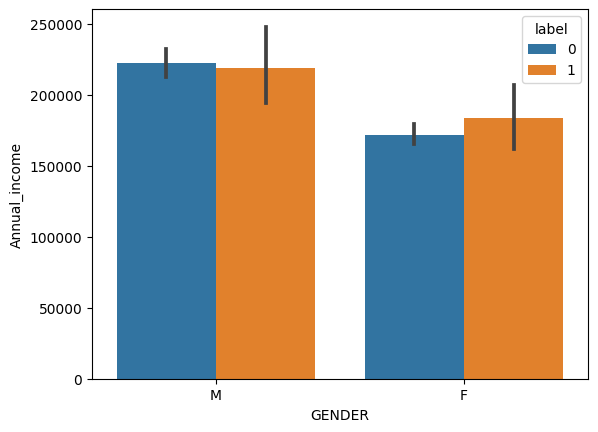

In [ ]:
import seaborn as sns
sns.barplot(data=credit_card_raw,x='GENDER',y='Annual_income',hue='label')

<Axes: xlabel='GENDER', ylabel='CHILDREN'>

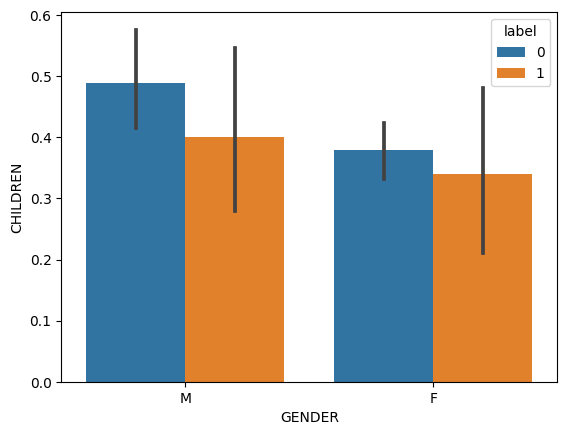

In [ ]:
sns.barplot(data=credit_card_raw,x='GENDER',y='CHILDREN',hue='label')

<Axes: xlabel='GENDER', ylabel='age'>

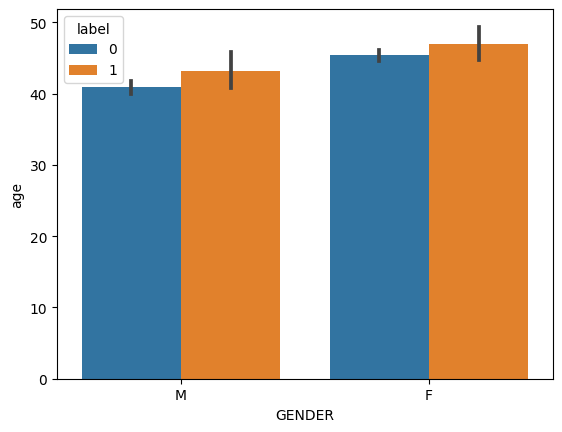

In [ ]:
sns.barplot(data=credit_card_raw,x='GENDER',y='age',hue='label')

<Axes: xlabel='GENDER', ylabel='EMAIL_ID'>

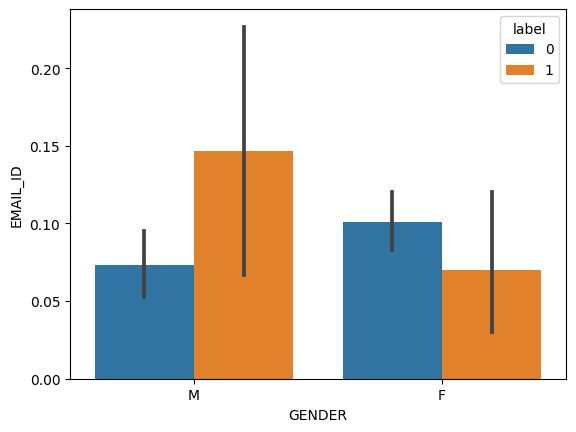

In [ ]:
sns.barplot(data=credit_card_raw,x='GENDER',y='EMAIL_ID',hue='label')

Text(0.5, 1.0, 'Number of people Occupation wise')

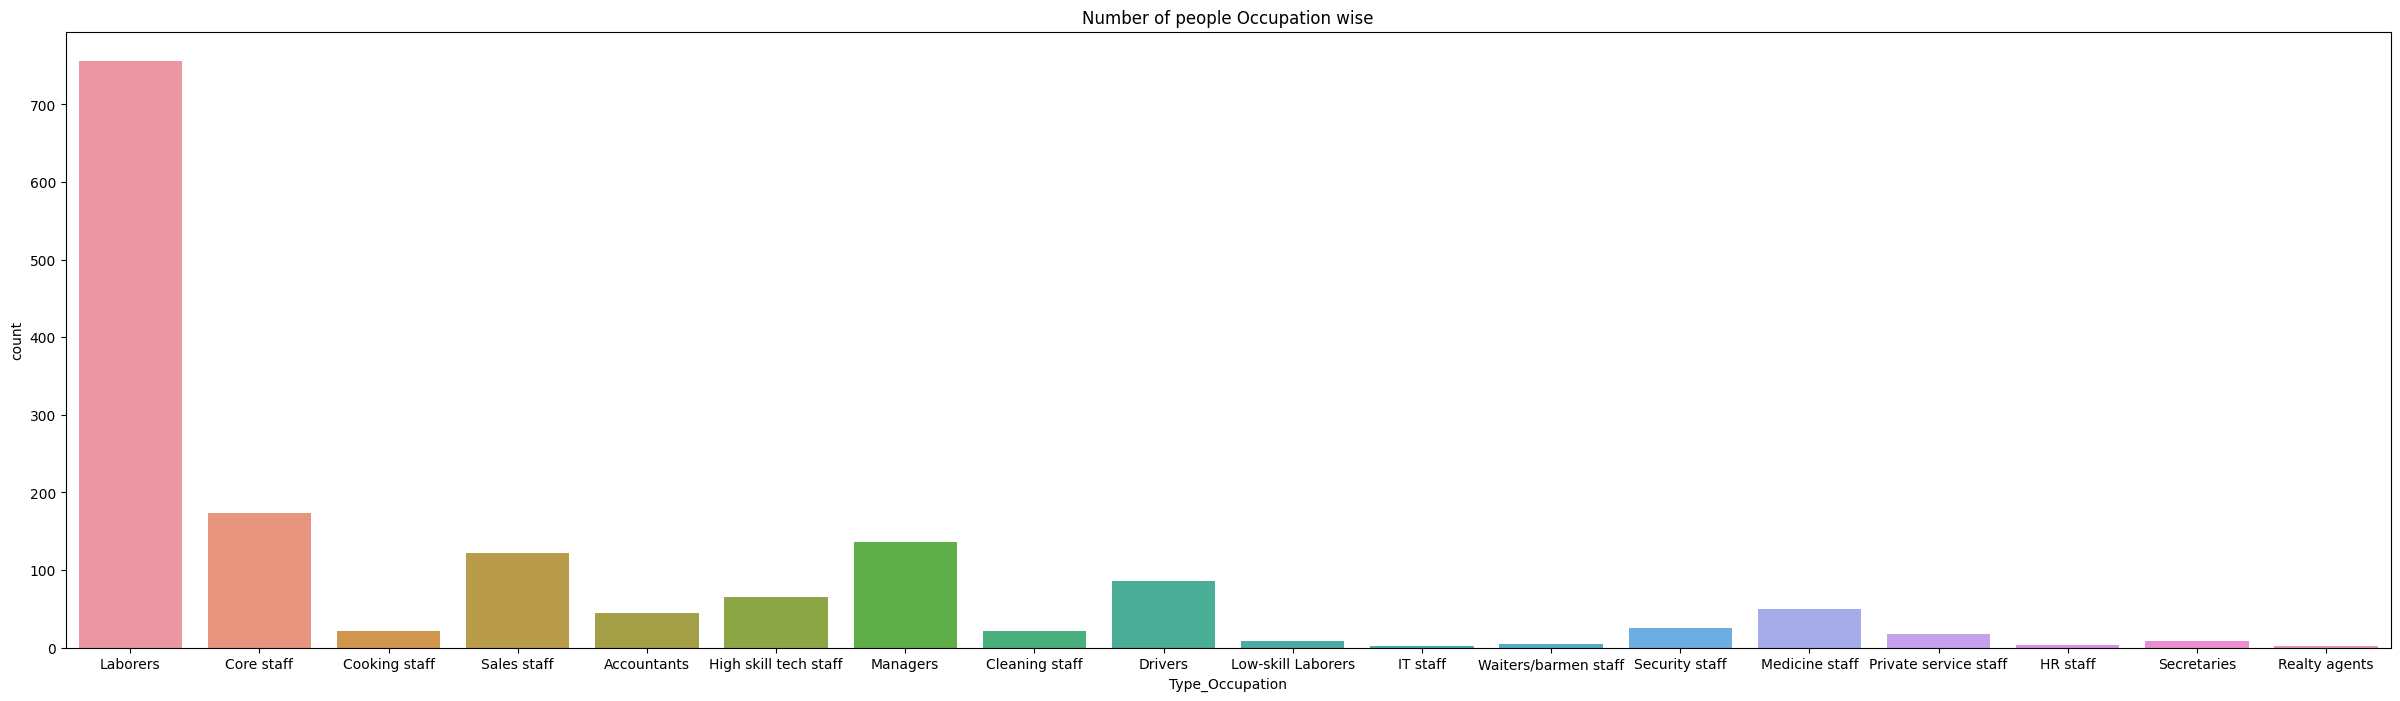

In [ ]:
plt.figure(figsize=(30,8))
sns.countplot(x=credit_card_raw['Type_Occupation'])
plt.title("Number of people Occupation wise")

Text(0.5, 1.0, 'Distribution of Annual Income')

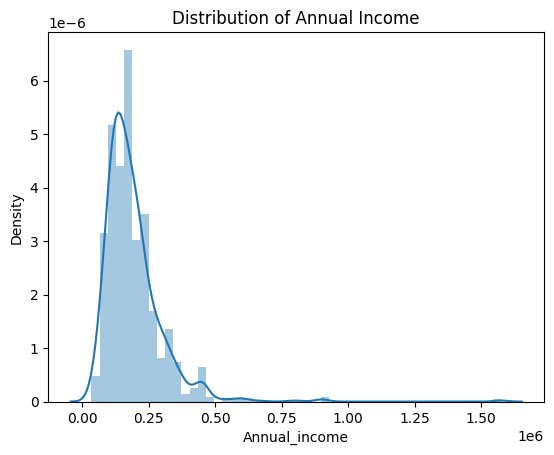

In [ ]:
#Numerical variables distribution
sns.distplot(credit_card_raw['Annual_income'])
plt.title("Distribution of Annual Income")

# Applying Log transformations for Annual Income

Text(0.5, 1.0, 'Distribution of Annual Income')

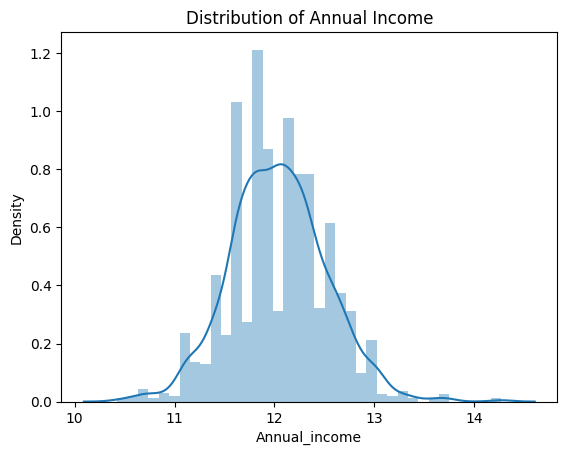

In [ ]:
sns.distplot(np.log(credit_card_raw['Annual_income']))
plt.title("Distribution of Annual Income")

Text(0.5, 1.0, 'Distribution of age')

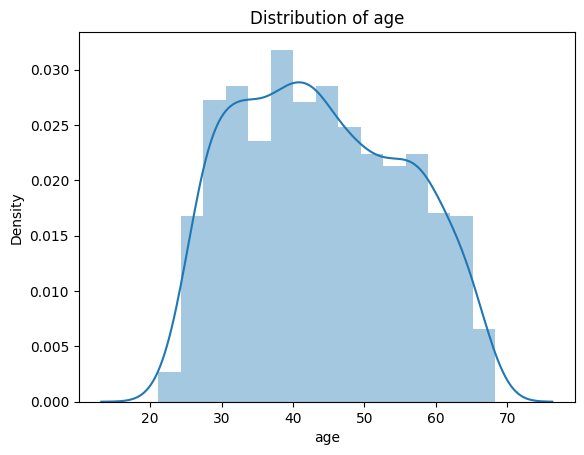

In [ ]:
sns.distplot(credit_card_raw['age'])
plt.title("Distribution of age")

In [ ]:
credit_card_raw=credit_card_raw.drop(['Mobile_phone'],axis=1)

<Axes: >

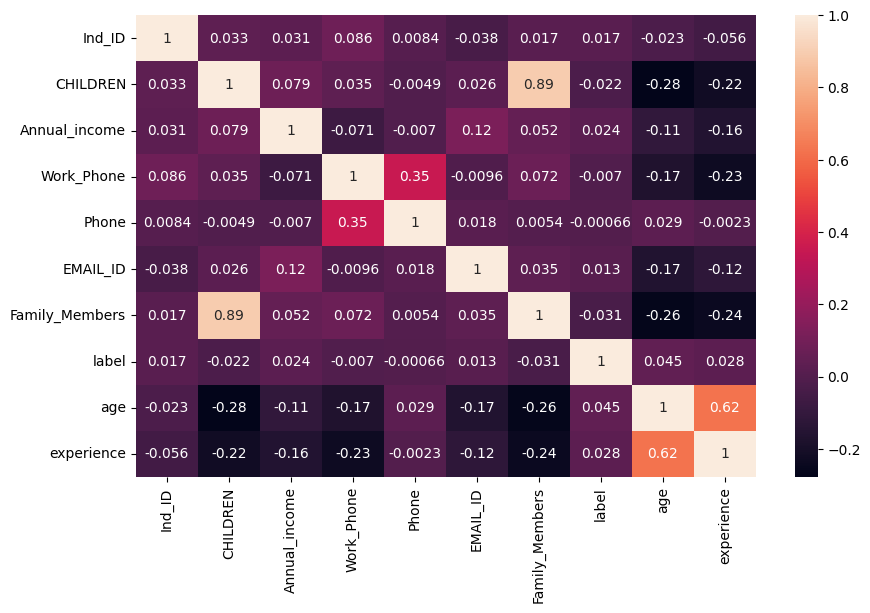

In [ ]:
corr=credit_card_raw.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

# Detecting and removal of outliers

In [ ]:
credit_card_raw.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation',
       'Family_Members', 'label', 'age', 'experience'],
      dtype='object')

<Axes: >

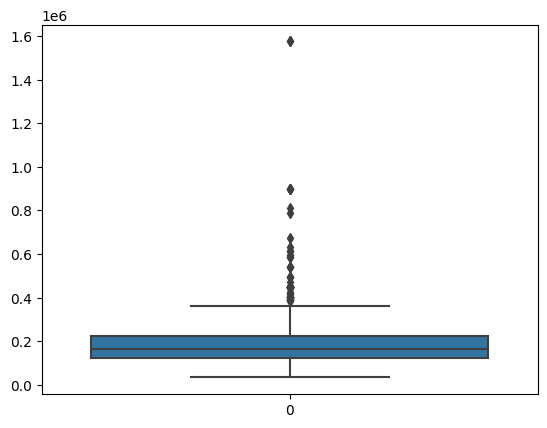

In [ ]:
sns.boxplot(credit_card_raw['Annual_income'])

In [ ]:
Q1=credit_card_raw['Annual_income'].quantile(0.25)
Q3=credit_card_raw['Annual_income'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

credit_card_raw['Annual_income']=np.where(credit_card_raw['Annual_income']<lower,lower,credit_card_raw['Annual_income'])
credit_card_raw['Annual_income']=np.where(credit_card_raw['Annual_income']>upper,upper,credit_card_raw['Annual_income'])

After removal of outliers

<Axes: >

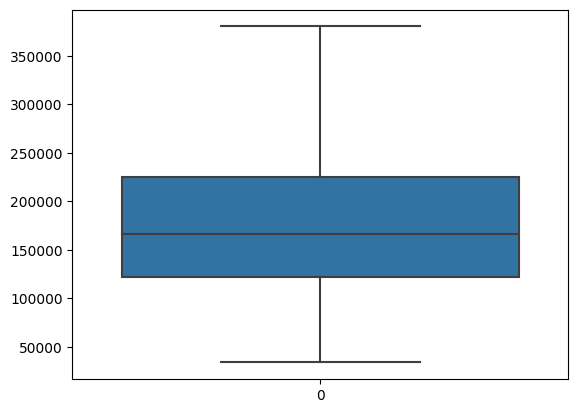

In [ ]:
sns.boxplot(credit_card_raw['Annual_income'])

In [ ]:
Q1=credit_card_raw['Family_Members'].quantile(0.25)
Q3=credit_card_raw['Family_Members'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

credit_card_raw['Family_Members']=np.where(credit_card_raw['Family_Members']<lower,lower,credit_card_raw['Family_Members'])
credit_card_raw['Family_Members']=np.where(credit_card_raw['Family_Members']>upper,upper,credit_card_raw['Family_Members'])

<Axes: >

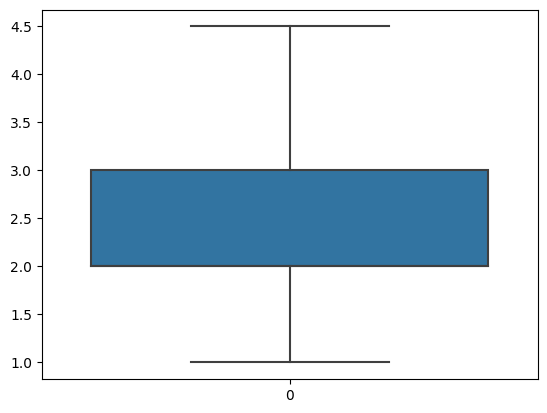

In [ ]:
sns.boxplot(credit_card_raw['Family_Members'])

In [ ]:
credit_card_raw.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation',
       'Family_Members', 'label', 'age', 'experience'],
      dtype='object')

# Feature Engineering

# Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()
credit_card_raw[['Type_Income']]=oe.fit_transform(credit_card_raw[['Type_Income']])
credit_card_raw[['EDUCATION']]=oe.fit_transform(credit_card_raw[['EDUCATION']])
credit_card_raw[['Housing_type']]=oe.fit_transform(credit_card_raw[['Housing_type']])
credit_card_raw[['Type_Occupation']]=oe.fit_transform(credit_card_raw[['Type_Occupation']])


# One Hot Coding

In [ ]:
credit_card_raw=pd.get_dummies(credit_card_raw,columns=['Car_Owner',	'Propert_Owner','Marital_status','GENDER'],drop_first=True)

In [ ]:
credit_card_raw.head()

,Ind_ID,CHILDREN,Annual_income,Type_Income,EDUCATION,Housing_type,Work_Phone,Phone,EMAIL_ID,Type_Occupation,...,label,age,experience,Car_Owner_Y,Propert_Owner_Y,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,GENDER_M
0,5008827,0,180000.0,1.0,1.0,1.0,0,0,0,8.0,...,1,51.430137,1000.665753,1,1,1,0,0,0,1
1,5009744,0,315000.0,0.0,1.0,1.0,1,1,0,8.0,...,1,37.142466,1.605479,1,0,1,0,0,0,0
2,5009746,0,315000.0,0.0,1.0,1.0,1,1,0,8.0,...,1,43.946143,1.605479,1,0,1,0,0,0,0
3,5009749,0,166500.0,0.0,1.0,1.0,1,1,0,8.0,...,1,37.142466,1.605479,1,0,1,0,0,0,0
4,5009752,0,315000.0,0.0,1.0,1.0,1,1,0,8.0,...,1,37.142466,1.605479,1,0,1,0,0,0,0


# Splitting the data

In [ ]:
X=credit_card_raw.drop(['label'],axis=1)
y=credit_card_raw['label']

# Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=10, random_state=10)

# Create an RFE object using the Random Forest classifier as the base estimator
rfe_method = RFE(rf_classifier, n_features_to_select=8, step=2)

# Fit the RFE object to the data
rfe_method.fit(X, y)

# Print the number of features selected
print("Num Features: %d" % rfe_method.n_features_)

# Print the selected features
print("Selected Features: %s" % rfe_method.support_)

# Print the feature ranking
print("Feature Ranking: %s" % rfe_method.ranking_)

Num Features: 8
Selected Features: [ True False  True  True  True False False False False  True  True  True
  True False False False False False False False]
Feature Ranking: [1 3 1 1 1 2 4 2 5 1 1 1 1 4 3 6 7 6 7 5]


In [ ]:
X.columns

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Type_Income', 'EDUCATION',
       'Housing_type', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation',
       'Family_Members', 'age', 'experience', 'Car_Owner_Y', 'Propert_Owner_Y',
       'Marital_status_Married', 'Marital_status_Separated',
       'Marital_status_Single / not married', 'Marital_status_Widow',
       'GENDER_M'],
      dtype='object')

In [ ]:
X1=X[['Ind_ID','Annual_income','Type_Income', 'EDUCATION','Family_Members','Type_Occupation', 'age', 'experience']]
y=credit_card_raw["label"]

# Beforing using SMOTE

In [ ]:
y.value_counts()

0    1373
1     175
Name: label, dtype: int64

# Treating Imbalance data  using SMOTE


In [ ]:
from imblearn.over_sampling import SMOTE
X,y=SMOTE().fit_resample(X1,y)

## After Using SMOTE

In [ ]:
y.value_counts()

1    1373
0    1373
Name: label, dtype: int64

# Training the Model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 70% training and 30% test

# Feature scaling

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report


lr=LogisticRegression()

lr.fit(X_train,y_train)
y_pred_train1=lr.predict(X_train)


y_pred1=lr.predict(X_test)
acc1=accuracy_score(y_test,y_pred1)

pre1=precision_score(y_test,y_pred1)
rec1=recall_score(y_test,y_pred1)
f1sc1=f1_score(y_test,y_pred1)

print("Training Accuracy of Logistic Regression : ",accuracy_score(y_pred_train1,y_train))

print("Accuracy of Logistic Regression : ",acc1)
print("Precision : ",pre1)
print("Recall : ",rec1)
print("f1 score : ",f1sc1)
print(confusion_matrix(y_test,y_pred1))

Training Accuracy of Logistic Regression :  0.535063752276867
Accuracy of Logistic Regression :  0.54
Precision :  0.5411764705882353
Recall :  0.5036496350364964
f1 score :  0.5217391304347826
[[159 117]
 [136 138]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()


dt.fit(X_train,y_train)

y_pred_train2=dt.predict(X_train)
y_pred2=dt.predict(X_test)

print("Training Accuracy of Decision Tree Classifier : ",accuracy_score(y_pred_train2,y_train))

acc2=accuracy_score(y_test,y_pred2)

pre2=precision_score(y_test,y_pred2)
rec2=recall_score(y_test,y_pred2)
f1sc2=f1_score(y_test,y_pred2)
print("Accuracy of Decision Tree classifier : ",acc2)
print("Precision : ",pre2)
print("Recall : ",rec2)
print("f1 score : ",f1sc2)
print(confusion_matrix(y_test,y_pred2))

Training Accuracy of Decision Tree Classifier :  1.0
Accuracy of Decision Tree classifier :  0.5581818181818182
Precision :  0.5311871227364185
Recall :  0.9635036496350365
f1 score :  0.6848249027237355
[[ 43 233]
 [ 10 264]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred3=rf.predict(X_test)

y_pred_train3=rf.predict(X_train)

print("Training Accuracy of Random Forest Classifier : ",accuracy_score(y_pred_train3,y_train))

acc3=accuracy_score(y_test,y_pred3)
pre3=precision_score(y_test,y_pred3)
rec3=recall_score(y_test,y_pred3)
f1sc3=f1_score(y_test,y_pred3)
print("Accuracy of Random forest Classifier : ",acc3)
print("Precision : ",pre3)
print("Recall : ",rec3)
print("f1 score : ",f1sc3)
print(confusion_matrix(y_test,y_pred3))

Training Accuracy of Random Forest Classifier :  1.0
Accuracy of Random forest Classifier :  0.6709090909090909
Precision :  0.604494382022472
Recall :  0.9817518248175182
f1 score :  0.7482614742698193
[[100 176]
 [  5 269]]


In [ ]:
from xgboost import XGBClassifier
xg=XGBClassifier()

xg.fit(X_train,y_train)
y_pred4=xg.predict(X_test)

y_pred_train4=xg.predict(X_train)


print("Training Accuracy of XGBClassifier : ",accuracy_score(y_pred_train4,y_train))

acc4=accuracy_score(y_test,y_pred4)
pre4=precision_score(y_test,y_pred4)
rec4=recall_score(y_test,y_pred4)
f1sc4=f1_score(y_test,y_pred4)
print("Accuracy of XGBClassifier : ",acc4)
print("Precision : ",pre4)
print("Recall : ",rec4)
print("f1 score : ",f1sc4)
print(confusion_matrix(y_test,y_pred4))

Training Accuracy of XGBClassifier :  0.9968123861566485
Accuracy of XGBClassifier :  0.6072727272727273
Precision :  0.5591836734693878
Recall :  1.0
f1 score :  0.7172774869109948
[[ 60 216]
 [  0 274]]


In [ ]:
Data=pd.DataFrame({"Models":['LOGISTIC REGRESSION','DECISION TREE CLASSIFIER','RANDOM FOREST CLASSIFIER','XGBOOST CLASSIFIER'],
                   "Accuracy":[acc1,acc2,acc3,acc4],
                  "Precision":[pre1,pre2,pre3,pre4],
                   "Recall":[rec1,rec2,rec3,rec4],
                   "f1-score":[f1sc1,f1sc2,f1sc3,f1sc4]},index=[1,2,3,4])

Data

,Models,Accuracy,Precision,Recall,f1-score
1,LOGISTIC REGRESSION,0.540000,0.541176,0.503650,0.521739
2,DECISION TREE CLASSIFIER,0.556364,0.530242,0.959854,0.683117
3,RANDOM FOREST CLASSIFIER,0.670909,0.604494,0.981752,0.748261
4,XGBOOST CLASSIFIER,0.607273,0.559184,1.000000,0.717277


Text(0.5, 1.0, 'Accuracies before Hyper parameter tuning')

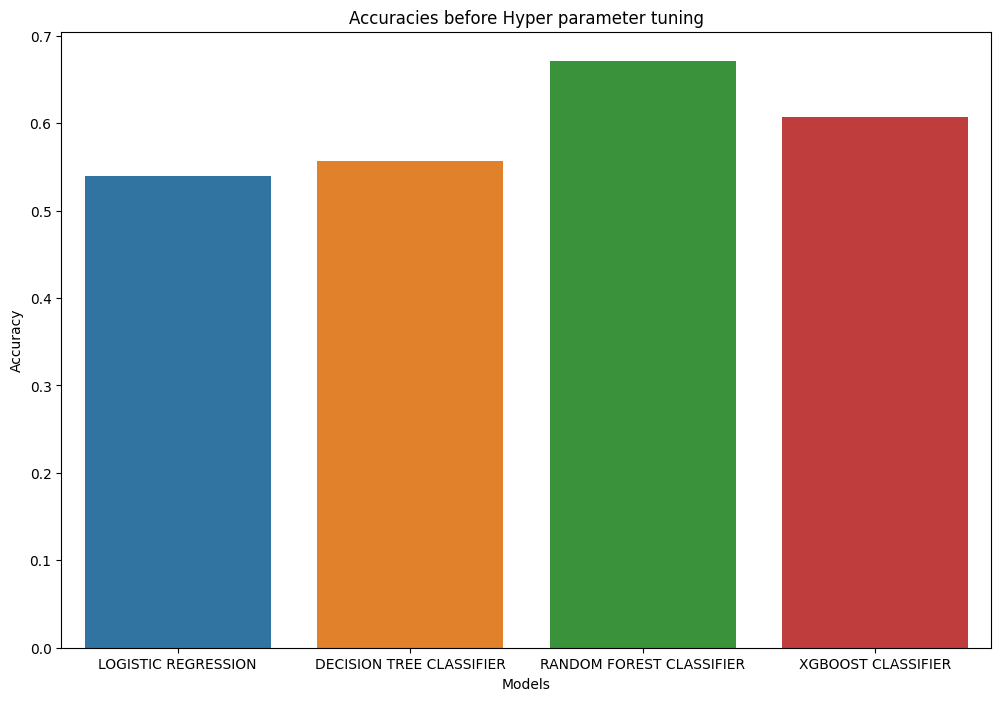

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(x=Data['Models'],y=Data['Accuracy'])
plt.title("Accuracies before Hyper parameter tuning")

# K Fold Cross-Validation

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.svm import SVC


In [ ]:
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=10)

print("Logistic Regression Classifier  Accuracy is",round((cross_val_score(lr,X,y,cv=skf,scoring="accuracy").mean())*100,2))
print(classification_report(y_test,y_pred1))

Logistic Regression Classifier  Accuracy is 49.78
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       276
           1       0.54      0.50      0.52       274

    accuracy                           0.54       550
   macro avg       0.54      0.54      0.54       550
weighted avg       0.54      0.54      0.54       550



In [ ]:
print("Decision Tree Classifier  Accuracy is",round((cross_val_score(dt,X,y,cv=skf,scoring="accuracy").mean())*100,2))
print(classification_report(y_test,y_pred2))

Decision Tree Classifier  Accuracy is 90.9
              precision    recall  f1-score   support

           0       0.81      0.16      0.26       276
           1       0.53      0.96      0.68       274

    accuracy                           0.56       550
   macro avg       0.67      0.56      0.47       550
weighted avg       0.67      0.56      0.47       550



In [ ]:
print("Random Forest Classifier Accuracy is",round((cross_val_score(rf,X,y,cv=skf,scoring="accuracy").mean())*100,2))
print(classification_report(y_test,y_pred3))

Random Forest Classifier Accuracy is 95.88
              precision    recall  f1-score   support

           0       0.95      0.36      0.52       276
           1       0.60      0.98      0.75       274

    accuracy                           0.67       550
   macro avg       0.78      0.67      0.64       550
weighted avg       0.78      0.67      0.64       550



In [ ]:
print("XGBoost Classifier Accuracy is",round((cross_val_score(xg,X,y,cv=skf,scoring="accuracy").mean())*100,2))
print(classification_report(y_test,y_pred4))

XGBoost Classifier Accuracy is 95.59
              precision    recall  f1-score   support

           0       1.00      0.22      0.36       276
           1       0.56      1.00      0.72       274

    accuracy                           0.61       550
   macro avg       0.78      0.61      0.54       550
weighted avg       0.78      0.61      0.54       550



# Hyper Parameter Tuning

# ___Grid Search CV____

# Logistic Regression

In [ ]:
param_grid=[{'penalty':['l1','l2','elasticnet','none'],
            'C' : np.logspace(-4,4,20),
            'solver': ['lbfgs','newton-cg','liblinear','sag','sage'],
            'max_iter':[100,1000,2500,5000]
          }]
print(param_grid)
from sklearn.model_selection import GridSearchCV

log_grid=GridSearchCV(estimator=lr,param_grid=param_grid,cv=3,verbose=True,n_jobs=-1)
log_grid.fit(X_train,y_train)

[{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]), 'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'sage'], 'max_iter': [100, 1000, 2500, 5000]}]
Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'sage']}],
             verbose=True)

In [ ]:
print(log_grid.best_estimator_)
print(f"Accuracy of Logistic Regresssion after Hyper Parameter Tuning  is {log_grid.best_score_:.2f}")

LogisticRegression(C=0.03359818286283781, penalty='l1', solver='liblinear')
Accuracy of Logistic Regresssion after Hyper Parameter Tuning  is 0.54


# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
params =  {
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3]
}
# Create gridsearch instance
dt_grid = GridSearchCV(estimator=dt,
                    param_grid=params,
                    cv=10,
                    n_jobs=-1,
                    verbose=2)
# Fit the model
dt_grid.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3], 'min_samples_leaf': [1, 2, 3]},
             verbose=2)

In [ ]:
print(dt_grid.best_estimator_)
print(dt_grid.best_params_)
print(f"Accuracy of Decision Tree Classifier after Hyper Parameter Tuning is {dt_grid.best_score_:.2f}")

DecisionTreeClassifier(max_depth=3)
{'max_depth': 3, 'min_samples_leaf': 1}
Accuracy of Decision Tree Classifier after Hyper Parameter Tuning is 0.69


# Random Forest Classifier

In [ ]:
# Number of trees in random forest
n_estimators=[20,60,100,120]

# Number of features to consider at every split
max_features=[0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth=[2,8,None]

# Number of samples
max_samples=[0.5,0.75,1.0]
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,

            'max_samples': max_samples
          }
print(param_grid)
from sklearn.model_selection import GridSearchCV

rf_grid=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
rf_grid.fit(X_train,y_train)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}
Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [ ]:
print(rf_grid.best_params_)
print(f"Accuracy of Random Forest Classifier after Hyper Parameter Tuning  is {rf_grid.best_score_:.2f}")

{'max_depth': None, 'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 100}
Accuracy of Random Forest Classifier after Hyper Parameter Tuning  is 0.95


# XGBClassifier

In [ ]:
param_test = {'max_depth':[3,5,6,7,9]}
model = XGBClassifier(learning_rate=0.3,
                     n_estimators=16,
                     max_depth=6,
                     min_child_weight=1,
                     gamma=0,
                     subsample=1,
                     colsample_bytree=1,
                     objective='binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     random_state=27)
xgb_grid = GridSearchCV(estimator=model, param_grid = param_test, scoring='roc_auc', cv=5)
xgb_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.3, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=6,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=16,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             param_grid={'max_depth': [3, 5, 6, 7, 9]}, scoring='roc_auc')

In [ ]:
# Print the best score and the corresponding hyperparameters
print(f'The best score of XGBoost Classifier after hyper parameter tuning is {xgb_grid.best_score_:.2f}')
print(f'The best hyperparameters are {xgb_grid.best_params_}')

The best score of XGBoost Classifier after hyper parameter tuning is 0.97
The best hyperparameters are {'max_depth': 9}


In [ ]:
Accuracy_Final=pd.DataFrame({'Models':['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','XGB Classifier'],
                             'Accuracy':[log_grid.best_score_,dt_grid.best_score_,rf_grid.best_score_,xgb_grid.best_score_]},
                            index=[1,2,3,4])



In [ ]:
Accuracy_Final


,Models,Accuracy
1,Logistic Regression,0.534153
2,Decision Tree Classifier,0.683526
3,Random Forest Classifier,0.952631
4,XGB Classifier,0.974686


Text(0.5, 1.0, 'Accuracies after Hyper parameter tuning')

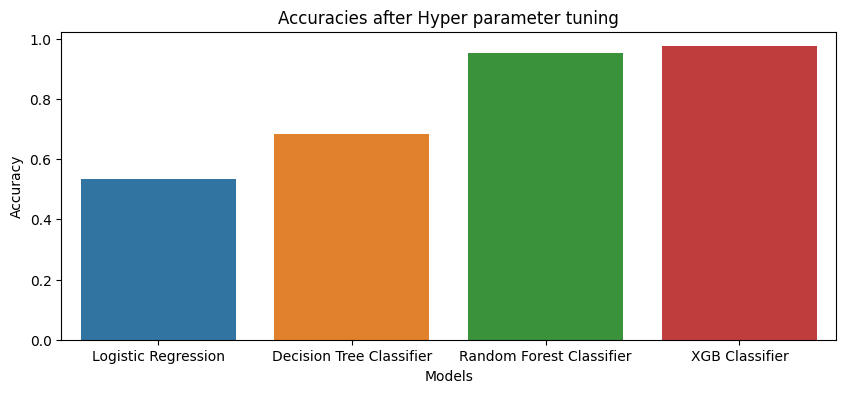

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x=Accuracy_Final['Models'],y=Accuracy_Final['Accuracy'])
plt.title("Accuracies after Hyper parameter tuning")

# After Hyper parameter Tuning
## By Comparing all the four models:

Logistic Regression	:- 74%

Decision Tree Classifier:- 75%

Random Forest Classifier:- 95%

XGB Classifier:- 97%


 **XGB Classifier is the most appropriate model for Credit card Approval Process as it has highest accuracy of 97%.**